In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
sns.set()

In [2]:
warnings.filterwarnings('ignore')

### census data... predicting if income exceeds 50k
https://cseweb.ucsd.edu/classes/sp15/cse190-c/reports/sp15/048.pdf

In [8]:
df = pd.read_csv('adult.csv', header=None, sep=',')

In [9]:
df.shape

(32561, 15)

In [10]:
df.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype='int64')

In [12]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [13]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 
             'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
             'income']

In [14]:
df.columns = col_names

In [16]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [17]:
df.shape

(32561, 15)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [20]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [22]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

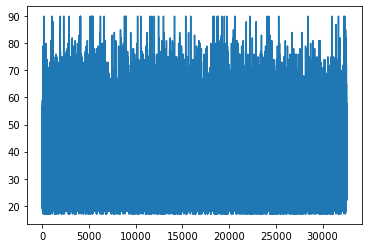

In [23]:
plt.plot(df['age'])

#### A bit right skewed...

<AxesSubplot:xlabel='age', ylabel='Count'>

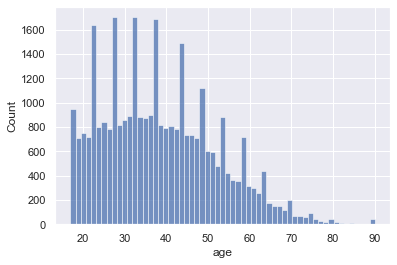

In [31]:
sns.histplot(df['age'], kde=False)

<AxesSubplot:xlabel='age', ylabel='Count'>

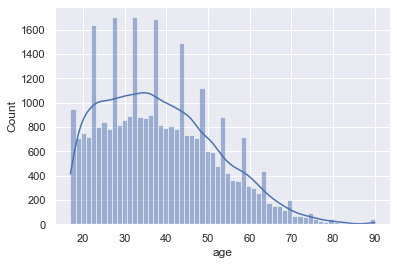

In [30]:
sns.histplot(df['age'], kde=True)

<AxesSubplot:>

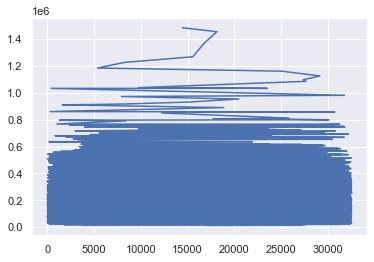

In [42]:
df['fnlwgt'].sort_values().plot()

<AxesSubplot:>

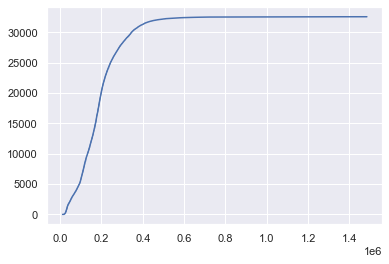

In [49]:
sns.lineplot(x=df['fnlwgt'].sort_values().values, y=[i for i in range(0,df.shape[0])])

<AxesSubplot:>

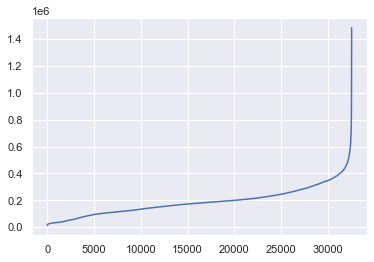

In [54]:
sns.lineplot(y=df['fnlwgt'].sort_values().values, x=[i for i in range(0,df.shape[0])])

<AxesSubplot:xlabel='fnlwgt', ylabel='Count'>

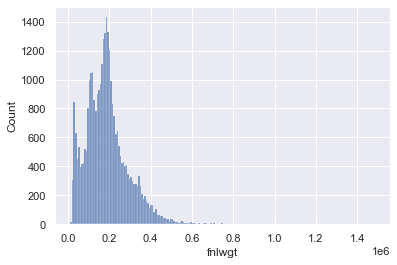

In [56]:
sns.histplot(df['fnlwgt'])

We can normalize these values but normalizing these might not be needed for naive bayes...

In [91]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

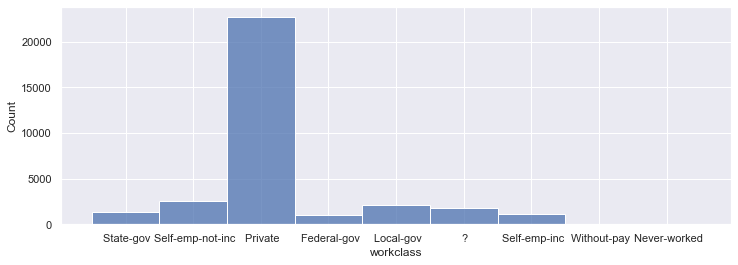

In [88]:
plt.figure(figsize=(12,4))
ax = sns.histplot(df['workclass'])

In [105]:
df['workclass'].replace(' ', '', regex=True, inplace=True)

In [107]:
df['workclass'].replace('?', 'Unknown', inplace=True)

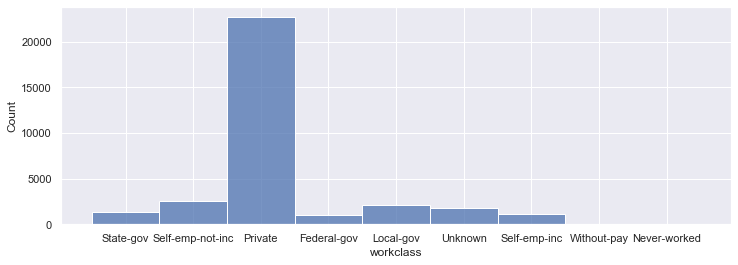

In [108]:
plt.figure(figsize=(12,4))
ax = sns.histplot(df['workclass'])

In [109]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
Unknown              1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [110]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [121]:
df['education'].replace(' ', '', regex=True, inplace=True)
df['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

The categories can be generalized to combine 2 categories in 1 i.e. College / bachelor if same can be combined to 1.

In [116]:
df['education_num'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education_num, dtype: int64

In [125]:
df[df['education'] == 'Doctorate']['education_num'].value_counts()

16    413
Name: education_num, dtype: int64

In [131]:
# Education Number and Education is fully proportional to each other...
# We can run some test to check whether they're related or not..
df_edu_edunum_relation = df.groupby(['education', 'education_num']).size().reset_index().pivot(
    columns=['education_num'], index=['education'], values=0)

<AxesSubplot:xlabel='education'>

<Figure size 1296x576 with 0 Axes>

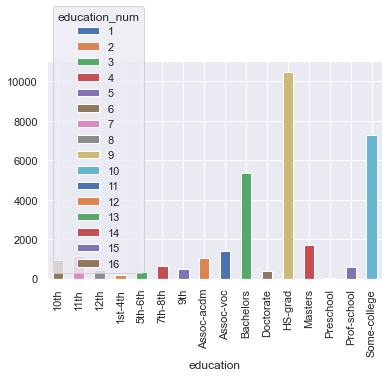

In [135]:
plt.figure(figsize=(18,8))
df_edu_edunum_relation.plot(kind='bar', stacked=True)

So the 2 features are completely correlated to each other...

In [142]:
df['marital_status'].replace(' ', '', regex=True, inplace=True)
df['marital_status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64

In [144]:
df['occupation'].replace(' ', '', regex=True, inplace=True)
df['occupation'].replace('?', 'Unknown', inplace=True)
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Unknown              1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [150]:
df['relationship'].replace(' ', '', regex=True, inplace=True)
df['relationship'].value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [153]:
df['race'].replace(' ', '', regex=True, inplace=True)
df['race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [157]:
df['sex'].replace(' ', '', regex=True, inplace=True)
df['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

In [160]:
df['capital_gain'].unique()

array([ 2174,     0, 14084,  5178,  5013,  2407, 14344, 15024,  7688,
       34095,  4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,
        2176,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865, 99999,  6514,  1471,  2329,  2105,  2885, 25124,
       10520,  2202,  2961, 27828,  6767,  2228,  1506, 13550,  2635,
        5556,  4787,  3781,  3137,  3818,  3942,   914,   401,  2829,
        2977,  4934,  2062,  2354,  5455, 15020,  1424,  3273, 22040,
        4416,  3908, 10566,   991,  4931,  1086,  7430,  6497,   114,
        7896,  2346,  3418,  3432,  2907,  1151,  2414,  2290, 15831,
       41310,  4508,  2538,  3456,  6418,  1848,  3887,  5721,  9562,
        1455,  2036,  1831, 11678,  2936,  2993,  7443,  6360,  1797,
        1173,  4687,  6723,  2009,  6097,  2653,  1639, 18481,  7978,
        2387,  5060])

<AxesSubplot:ylabel='capital_gain'>

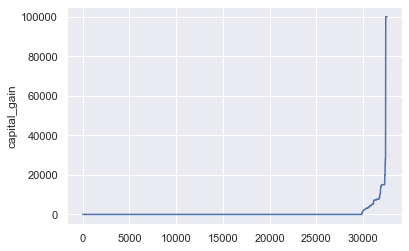

In [169]:
sns.lineplot(x=[i for i in range(0,df.shape[0])], y=df['capital_gain'].sort_values())

<AxesSubplot:ylabel='capital_gain'>

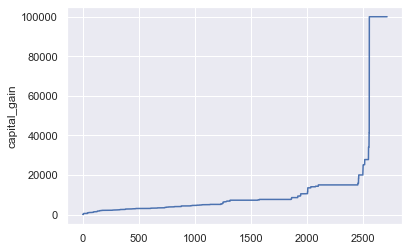

In [162]:
a = df[df['capital_gain'] > 0].copy()
sns.lineplot(x=[i for i in range(0,a.shape[0])], y=a['capital_gain'].sort_values())

<AxesSubplot:ylabel='capital_loss'>

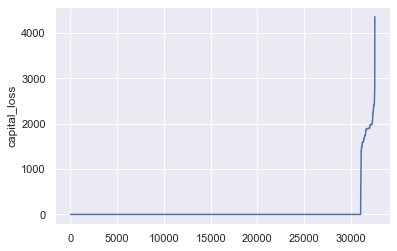

In [164]:
sns.lineplot(x=[i for i in range(0,df.shape[0])], y=df['capital_loss'].sort_values())

<AxesSubplot:ylabel='capital_loss'>

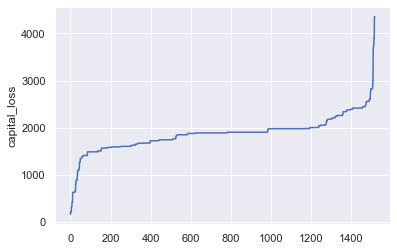

In [166]:
b = df[df['capital_loss'] > 0].copy()
sns.lineplot(x=[i for i in range(0,b.shape[0])], y=b['capital_loss'].sort_values())

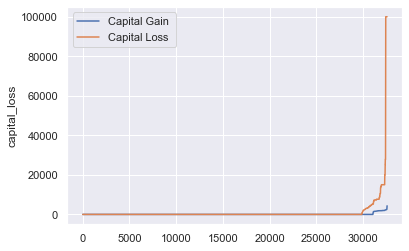

In [176]:
sns.lineplot(x=[i for i in range(0,df.shape[0])], y=df['capital_loss'].sort_values(), label='Capital Gain')
sns.lineplot(x=[i for i in range(0,df.shape[0])], y=df['capital_gain'].sort_values(), label='Capital Loss ')
plt.legend()

<AxesSubplot:ylabel='capital_gain'>

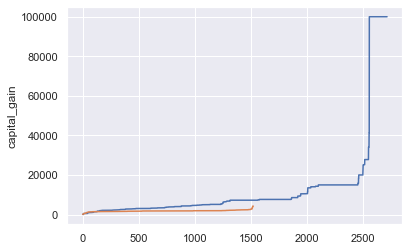

In [177]:
a = df[df['capital_gain'] > 0].copy()
sns.lineplot(x=[i for i in range(0,a.shape[0])], y=a['capital_gain'].sort_values())
b = df[df['capital_loss'] > 0].copy()
sns.lineplot(x=[i for i in range(0,b.shape[0])], y=b['capital_loss'].sort_values())

<AxesSubplot:xlabel='hours_per_week', ylabel='Count'>

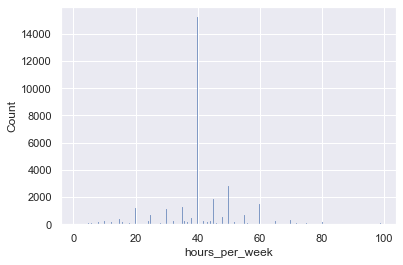

In [184]:
sns.histplot(df['hours_per_week'])

In [193]:
df['hours_per_week'].unique()

array([40, 13, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55,
       48, 58, 32, 70,  2, 22, 56, 41, 28, 36, 24, 46, 42, 12, 65,  1, 10,
       34, 75, 98, 33, 54,  8,  6, 64, 19, 18, 72,  5,  9, 47, 37, 21, 26,
       14,  4, 59,  7, 99, 53, 39, 62, 57, 78, 90, 66, 11, 49, 84,  3, 17,
       68, 27, 85, 31, 51, 77, 63, 23, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95])

In [202]:
df['native_country'].replace(' ', '', regex=True, inplace=True)
df['native_country'].replace('?', 'Unknown', inplace=True)

In [203]:
df['native_country'].value_counts()

United-States                 29170
Mexico                          643
Unknown                         583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

<AxesSubplot:xlabel='count', ylabel='native_country'>

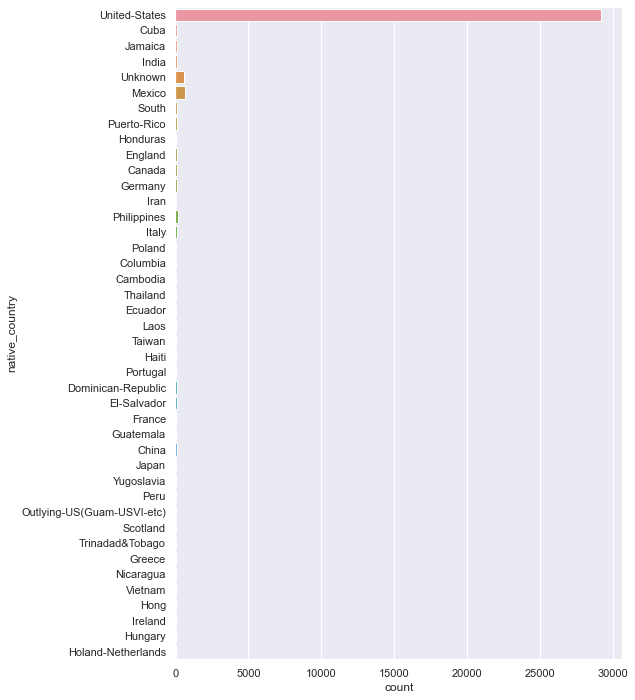

In [204]:
plt.figure(figsize=(8,12))
sns.countplot(y=df['native_country'])

In [206]:
df['income'].value_counts()

 <=50K    24720
 >50K      7841
Name: income, dtype: int64

#### We'll keep the values to Unknown instead of replacing with Mode...

In [211]:
from sklearn.model_selection import train_test_split

In [213]:
X = df.drop(['income'], axis=1).copy()
y = df['income'].copy()

In [267]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=36)

In [222]:
categorical_cols = np.array(X_train.select_dtypes('object').columns)

In [223]:
categorical_cols

array(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country'], dtype=object)

In [268]:
for col in categorical_cols:
    ohe = OneHotEncoder(sparse=False, categories=[df[col].unique()])
    train_encoded_values = ohe.fit_transform(X_train[[col]])
    test_encoded_values = ohe.transform(X_test[[col]])
    
    train_encoded_df = pd.DataFrame(train_encoded_values, index=X_train.index, 
                                    columns=[f'{col}_' + k for k in df[col].unique()])
    test_encoded_df = pd.DataFrame(test_encoded_values, index=X_test.index, 
                                   columns=[f'{col}_' + k for k in df[col].unique()])
    
    #print(col, "sdf")
    X_train.drop(columns=[col], inplace=True)
    X_test.drop(columns=[col], inplace=True)
    
    X_train = X_train.join(train_encoded_df)
    X_test = X_test.join(test_encoded_df)

In [271]:
X_train.shape

(22792, 108)

In [272]:
X_test.shape

(9769, 108)

In [273]:
X_train.columns

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'workclass_State-gov', 'workclass_Self-emp-not-inc',
       'workclass_Private', 'workclass_Federal-gov',
       ...
       'native_country_Outlying-US(Guam-USVI-etc)', 'native_country_Scotland',
       'native_country_Trinadad&Tobago', 'native_country_Greece',
       'native_country_Nicaragua', 'native_country_Vietnam',
       'native_country_Hong', 'native_country_Ireland',
       'native_country_Hungary', 'native_country_Holand-Netherlands'],
      dtype='object', length=108)

In [275]:
X_test.columns

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'workclass_State-gov', 'workclass_Self-emp-not-inc',
       'workclass_Private', 'workclass_Federal-gov',
       ...
       'native_country_Outlying-US(Guam-USVI-etc)', 'native_country_Scotland',
       'native_country_Trinadad&Tobago', 'native_country_Greece',
       'native_country_Nicaragua', 'native_country_Vietnam',
       'native_country_Hong', 'native_country_Ireland',
       'native_country_Hungary', 'native_country_Holand-Netherlands'],
      dtype='object', length=108)

In [276]:
from sklearn.preprocessing import RobustScaler

The Robust Scalar uses the median value subtraction and then divides with (75th quartile - 25 quartile). Because the median and quatiles are different for each features, there is no scale defined for Robust Scalar unlike MinMaxScalar. The range of Robust Scalar is also higher than the range of MinMaxScalar.

If you are dealing with outliers and want to reduce the effect of ourliers then Robust Scalar is the best option.

In [277]:
rs = RobustScaler()

In [279]:
X_train_robust_scaled = rs.fit_transform(X_train)

In [280]:
X_train_encoded = pd.DataFrame(X_train_robust_scaled, index=X_train.index, columns=X_train.columns)

In [281]:
X_train_encoded

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_State-gov,workclass_Self-emp-not-inc,workclass_Private,workclass_Federal-gov,...,native_country_Outlying-US(Guam-USVI-etc),native_country_Scotland,native_country_Trinadad&Tobago,native_country_Greece,native_country_Nicaragua,native_country_Vietnam,native_country_Hong,native_country_Ireland,native_country_Hungary,native_country_Holand-Netherlands
1422,0.157895,0.203805,0.666667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22224,0.052632,-1.157194,1.333333,0.0,0.0,0.6,0.0,0.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1637,-0.473684,-0.747315,-0.333333,2202.0,0.0,1.6,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32315,-0.578947,0.705993,-0.333333,0.0,0.0,1.6,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24435,0.789474,-0.030777,-0.333333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7329,-0.210526,-0.384919,-0.333333,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19368,0.684211,-0.123372,-0.333333,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25502,-1.052632,1.169012,-1.666667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
610,0.789474,0.186834,1.333333,6849.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [282]:
X_test_robust_scaled = rs.transform(X_test)

In [283]:
X_test_encoded = pd.DataFrame(X_test_robust_scaled, index=X_test.index, columns=X_test.columns)

In [285]:
X_test_encoded.columns

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'workclass_State-gov', 'workclass_Self-emp-not-inc',
       'workclass_Private', 'workclass_Federal-gov',
       ...
       'native_country_Outlying-US(Guam-USVI-etc)', 'native_country_Scotland',
       'native_country_Trinadad&Tobago', 'native_country_Greece',
       'native_country_Nicaragua', 'native_country_Vietnam',
       'native_country_Hong', 'native_country_Ireland',
       'native_country_Hungary', 'native_country_Holand-Netherlands'],
      dtype='object', length=108)

In [286]:
X_train_encoded.columns

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week', 'workclass_State-gov', 'workclass_Self-emp-not-inc',
       'workclass_Private', 'workclass_Federal-gov',
       ...
       'native_country_Outlying-US(Guam-USVI-etc)', 'native_country_Scotland',
       'native_country_Trinadad&Tobago', 'native_country_Greece',
       'native_country_Nicaragua', 'native_country_Vietnam',
       'native_country_Hong', 'native_country_Ireland',
       'native_country_Hungary', 'native_country_Holand-Netherlands'],
      dtype='object', length=108)

In [287]:
from sklearn.naive_bayes import GaussianNB

In [288]:
model = GaussianNB()

In [289]:
model.fit(X_train, y_train)

GaussianNB()

In [290]:
prediction = model.predict(X_test)

In [291]:
prediction

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype='<U6')

In [292]:
from sklearn.metrics import confusion_matrix, classification_report

In [293]:
confusion_matrix(y_test, prediction)

array([[7032,  390],
       [1644,  703]])

In [295]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

       <=50K       0.81      0.95      0.87      7422
        >50K       0.64      0.30      0.41      2347

    accuracy                           0.79      9769
   macro avg       0.73      0.62      0.64      9769
weighted avg       0.77      0.79      0.76      9769



The overall accuracy of 80% is not good, specially the positive class if not performing well here.

##### Null Accuracy Comparison:
    Let's see if the model is performing well overall than the null accuracy. i.e. if we predicted all values to be negative.
    

In [299]:
y.value_counts()[0] / sum(y.value_counts().values)

0.7591904425539756

≈ 0.76

Our Accuracy i.e. 0.79 is better than this accuracy 0.76

#### Another iteration can be to drop the education column because it is correlated with Education_num column...

#### And replacing the missing values with proper labels...